# Project: Data Analysis For WeRateDogs Tweeter Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Gather Data</a></li>
<li><a href="#assess">Assess Data</a></li>
<li><a href="#clean">Clean Data</a></li>
<li><a href="#analyse">Analyse Data</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
The purpose of this notebook is to put into practice the art of data manipulation using real-world data. The process of data manipulation is divided into three parts: Gathering, Assessing, and Cleaning. The data used for this project is the tweet history of the Twitter user `@dog_rates`, also known as __WeRateDogs__. __WeRateDogs__ is a Twitter account that evaluates dogs and adds a humorous comment. The first step is to gather data from various sources in various forms. Then, we will evaluate the data through both visual and technical methods to pinpoint any issues with the data's quality or organization. Once issues have been identified, we will then use programming to clean and refine the data. Finally, we will analyze the refined data and present our findings through visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from wordcloud import WordCloud, STOPWORDS
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
plt.style.use('fivethirtyeight')

<a id='gather'></a>
# Gather Data
Collect the three pieces of data from various sources:

- The WeRateDogs Twitter archive is provided as `twitter-archive-enhanced.csv`.
- The predictions of images in the tweets can be obtained programmatically by downloading the `image-predictions.tsv` file using the Requests library from this [link](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv).

- The count of retweets and likes for each tweet can be obtained programmatically by downloading the `tweet-json.txt` file using the Requests library from this [link](https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt)
> The third piece of data was supposed to be obtained by Twitter API but I could't get my hands on it. I used the provided data by Udacity.

In [2]:
df1 = pd.read_csv('twitter-archive-enhanced.csv')
df1.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [3]:
# getting the second dataframe using requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [4]:
df2 = pd.read_csv('image-predictions.tsv', sep='\t')
df2.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Fail")
            fails_dict[tweet_id] = 'Fail'
            pass
end = timer()
print(end - start)
print(fails_dict)


In [5]:
# Downloading the third piece of data
url = 'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
response = requests.get(url)
with open(url.split('/')[-1], mode = 'wb') as file:
    file.write(response.content)

In [6]:
tweets = []
with open('tweet-json.txt', mode='r') as file:
    for line in file:
        record = json.loads(line)
        tweets.append(record)
tweets[0].keys()

dict_keys(['created_at', 'id', 'id_str', 'full_text', 'truncated', 'display_text_range', 'entities', 'extended_entities', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'possibly_sensitive_appealable', 'lang'])

We are going to get `id`, `retweet_count`, `favorite_count` and `created_at`

In [7]:
df3 = pd.DataFrame(tweets, columns= ['id', 'retweet_count', 'favorite_count', 'created_at', 'retweeted'])
df3.head(2)

,id,retweet_count,favorite_count,created_at,retweeted
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,False
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,False


<a id='assess'></a>
# Assess Data
## Dataframe 1

In [8]:
print(f'df1 shape: {df1.shape}')

df1 shape: (2356, 17)


In [9]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- `source` column is not clean.
- the last 4 columns (`doggo`, `floofer`, `pupper` and `puppo`) represent the same valiable that we could call `type`.

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

- `tweet_id`: should be of type `str`.
- `timestamp` and `retweeted_status_timestamp`: should be of type `datetime` instead of `object`.
- There are 181 retweets by looking at `retweeted_status_id`.
- There are 78 replies by looking at `in_reply_to_user_id`.

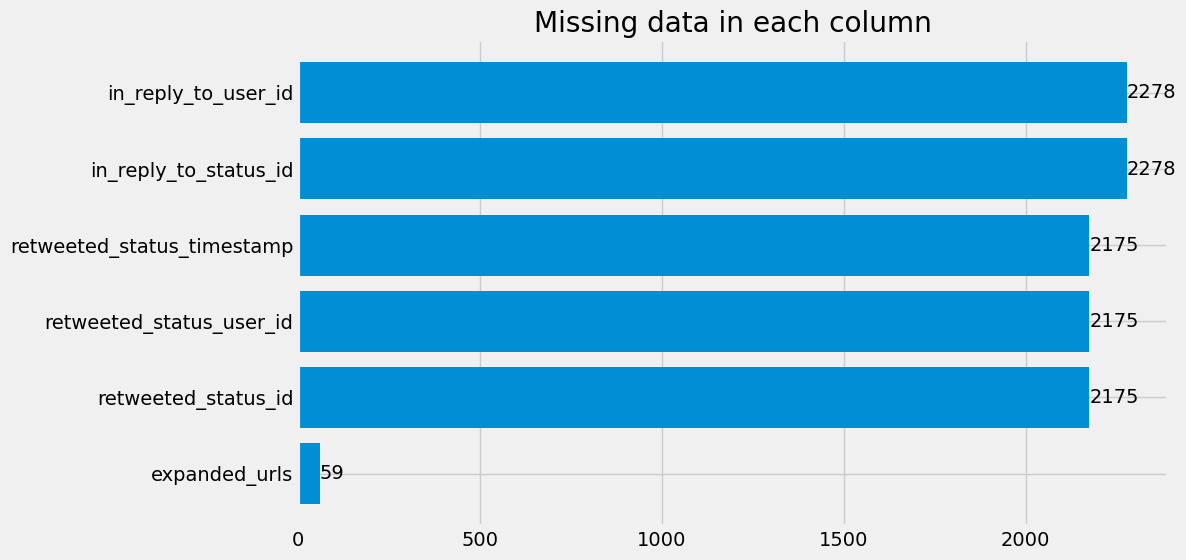

In [11]:
# getting columns with missing values and the count of missing values
missing = df1.isnull().sum()[df1.isnull().sum()>0].sort_values()
# plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(missing.keys(), missing.values)
ax.set_title("Missing data in each column")
ax.bar_label(bars)
plt.show()

- over 2000 missing values in the following columns (`in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id` and `retweeted_status_id`).
- 59 `NaN`'s in `expanded_urls` feature.

Next I will see whether there are any duplicate rows.

In [12]:
df1.duplicated().sum()

0

In [13]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

- some `rating_denominator` are not in the same scale.

## Dataframe 2

In [14]:
print(f'df2 shape: {df2.shape}')

df2 shape: (2075, 12)


In [15]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


- `tweet_id`: should be of type `str`.

In [17]:
df2.isnull().sum().sum()

0

There are no missing values in df2.

In [18]:
df2.duplicated().sum()

0

There are no duplicates in df2.

## Dataframe 3

In [19]:
print(f'df3 shape: {df3.shape}')

df3 shape: (2354, 5)


In [20]:
df3.head()

,id,retweet_count,favorite_count,created_at,retweeted
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,False
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,False
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,False
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,False
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,False


In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2354 non-null   int64 
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   retweeted       2354 non-null   bool  
dtypes: bool(1), int64(3), object(1)
memory usage: 76.0+ KB


- `id`: should be of type `str` and it should be renamed to `tweet_id` for cinsistency.
- `created_at`: should be of type `datetime` instead of `object`.

In [22]:
df3.isnull().sum().sum()

0

There are no missing values in df3.

In [23]:
df3.duplicated().sum()

0

There are no duplicate rows in df3.

## Problems:
### Quality
- Incorrect data types in columns (`tweet_id`, `id`, `timestamp`, `retweeted_status_timestamp` and `created_at`).
- There are 181 retweets by looking at `retweeted_status_id` and 78 replies by looking at `in_reply_to_user_id`.
- missing values in multiple columns (`in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id`, `retweeted_status_id` and `expanded_urls`).
- `source` column is not clean.
- Some `rating_denominator` are not in the same scale.
- Some rating values are hard to capture programmatically and will be corrected manually.
- Some column names are not clear.
- `p1`, `p2` and `p3` are inconsistent in capitalisation. Also, they don't always contain dog breeds.


### Tidiness 
- the last 4 columns (`doggo`, `floofer`, `pupper` and `puppo`) in df1 represent the same variable that we could call `type`.
- The three tables represent different features for the same `tweet`. They should be joined using `tweet_id` column.

<a id='clean'></a>
# Clean Data

creating copies of each dataframe before cleaning the data

In [24]:
df1_cleaned = df1.copy()
df2_cleaned = df2.copy()
df3_cleaned = df3.copy()

## Dataframe 1
### Define
- change the datatype of `tweet_id` to `str`.

### Code

In [25]:
df1_cleaned['tweet_id'] = df1_cleaned['tweet_id'].astype('str')

### Test

In [26]:
df1_cleaned.dtypes

tweet_id                       object
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Define
- change the datatype of `timestamp` and `retweeted_status_timestamp` to `datetime`.

### Code
This next function takes as argument a dataframe and a list of columns to convert to `datetime`.

In [27]:
def convert_to_datetime(df, columns):
    """
    This function converts the type of columns in a dataframe to datetime
    parameters:
    df: The dataframe.
    columns: a list of strings that are the columns to convert.
    """
    for col in columns:
        df[col] = pd.to_datetime(df[col]).dt.tz_localize(None)

In [28]:
convert_to_datetime(df1_cleaned, ['timestamp', 'retweeted_status_timestamp'])

### Test

In [29]:
df1_cleaned[['timestamp', 'retweeted_status_timestamp']].dtypes

timestamp                     datetime64[ns]
retweeted_status_timestamp    datetime64[ns]
dtype: object

### Define
- Remove the 181 retweets that exist in the dataset by filtering for rows that have values in `retweeted_status_id` column.
- Remove the 78 replies that exist in the dataset by filtering for rows that have values in `in_reply_to_user_id` column.

### Code

In [30]:
df1_cleaned = df1_cleaned[df1_cleaned.retweeted_status_id.isnull()]
df1_cleaned = df1_cleaned[df1_cleaned.in_reply_to_user_id.isnull()]

### Test

In [31]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2097 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   2097 non-null   datetime64[ns]
 4   source                      2097 non-null   object        
 5   text                        2097 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      datetime64[ns]
 9   expanded_urls               2094 non-null   object        
 10  rating_numerator            2097 non-null   int64         
 11  rating_denominator          2097 non-null   int64       

There is no value in `in_reply_to_user_id` or `retweeted_status_id` hence all the retweets and replies are removed.

### Define
- drop (`in_reply_to_user_id`, `in_reply_to_status_id`, `retweeted_status_timestamp`, `retweeted_status_user_id`, `retweeted_status_id`) as we will not need them in our analysis.

### Code

In [32]:
df1_cleaned.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                  'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

### Test

In [33]:
df1_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Define
- Clean the `source column` to represent readable values (`Twitter for iPhone`, `Vine - Make a Scene`, `Twitter Web Client` and `TweetDeck`).

### Code

In [34]:
df1_cleaned['source'][0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [35]:
# filtering every value and keeping only the meaninful part
df1_cleaned['source'] = df1_cleaned['source'].str.split('>').str[1].str[:-3]

### Test

In [36]:
df1_cleaned['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Define
- create a new column `type` that says the type of the dog (`doggo`, `floofer`, `pupper` or `puppo`).
- This new column will be extracted from `text` column to make sure the values are correct.
- drop the columns (`doggo`, `floofer`, `pupper` and `puppo`) as they are summarised in the `type` column.

### Code

In [37]:
df1_cleaned['type'] = df1_cleaned['text'].str.extract('(doggo|floofer|pupper|puppo)')
df1_cleaned['type'].value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: type, dtype: int64

In [38]:
df1_cleaned.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

### Test

In [39]:
df1_cleaned.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'type'],
      dtype='object')

In [40]:
df1_cleaned['type'].value_counts()

pupper     240
doggo       80
puppo       29
floofer      4
Name: type, dtype: int64

### Define
Scale ratings so that they are in the same scale.
- Get `rating_denominator` that are different than 10.
- Extract their true ratings from `df1_cleaned`.
- Do manual inspection and correct any mistakes.
- Scale the remaining values that are not to scale so that the `rating_numerator` is over `10`.
- Drop `rating_denominator` as it will become obselete and rename `rating_numerator` to `rating`.
- Clean some rating values manually.

### Code

In [41]:
df1_cleaned.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

I will take the rows where the denominator is different then 10

In [42]:
not_10 = df1_cleaned.rating_denominator.value_counts().keys()[1:]
df_not_10 = df1_cleaned[df1_cleaned['rating_denominator'].isin(not_10)][['text', 'rating_numerator', 'rating_denominator']]
df_not_10.style.set_properties(subset=['text'], **{'width': '700px'})

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. Keep Sam smiling by clicking and sharing this link: https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50


I will remove rows that does not have a rating

In [43]:
df1_cleaned.drop([516], axis=0, inplace=True)
df_not_10.drop([516], axis=0, inplace=True)

In [44]:
df_not_10.style.set_properties(subset=['text'], **{'width': '700px'})

,text,rating_numerator,rating_denominator
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50
1228,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90
1254,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80
1274,"From left to right: Cletus, Jerome, Alejandro, Burp, & Titson None know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50
1351,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50


In the `text` column we notice that the rating is in format `digit/digit` and is always at the end.
> PS: there are other `digit/digit` in the text but we don't want those.

In [45]:
denominator = df_not_10['text'].str.split('https').str[0].str.split('/').str[-1].str.extract('([0-9]+)')
denominator.rename(columns={0:'denominator'}, inplace=True)
denominator['denominator'] = denominator['denominator'].astype('int')
denominator

,denominator
433,70
902,150
1068,10
1120,170
1165,10
1202,10
1228,90
1254,80
1274,50
1351,50


In [46]:
nomirator = df_not_10['text'].str.split('https').str[0].str.split('/').str[-2].str[-3:]
nomirator = pd.DataFrame(nomirator)
nomirator['text'] = nomirator['text'].str.extract('([0-9]+)')
nomirator['text'] = nomirator['text'].astype('int')
nomirator.rename(columns={'text':'nomirator'}, inplace=True)
nomirator

,nomirator
433,84
902,165
1068,14
1120,204
1165,13
1202,11
1228,99
1254,80
1274,45
1351,60


In [47]:
new_ratings = pd.concat([nomirator, denominator], axis=1)
new_ratings

,nomirator,denominator
433,84,70
902,165,150
1068,14,10
1120,204,170
1165,13,10
1202,11,10
1228,99,90
1254,80,80
1274,45,50
1351,60,50


Now that we have got the new ratings. I will scale them so they are all `/10`.

In [48]:
new_ratings['divisor'] = new_ratings['denominator']/10
new_ratings['denominator'] = new_ratings['denominator'] / new_ratings['divisor']
new_ratings['nomirator'] = new_ratings['nomirator'] / new_ratings['divisor']
new_ratings

,nomirator,denominator,divisor
433,12.0,10.0,7.0
902,11.0,10.0,15.0
1068,14.0,10.0,1.0
1120,12.0,10.0,17.0
1165,13.0,10.0,1.0
1202,11.0,10.0,1.0
1228,11.0,10.0,9.0
1254,10.0,10.0,8.0
1274,9.0,10.0,5.0
1351,12.0,10.0,5.0


Now we are ready to put these values in our original dataframe

In [49]:
df1_cleaned.loc[new_ratings.index, 'rating_numerator'] = new_ratings['nomirator'].values

After manual inspection, we find these rows that needs change in the rating.

In [50]:
df1_cleaned.loc[[45, 1459, 1712],['text', 'rating_numerator', 'rating_denominator']].style.set_properties(subset=['text'], **{'width': '700px'})

,text,rating_numerator,rating_denominator
45,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5.000000,10
1459,"This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_) https://t.co/uaJmNgXR2P",4.000000,10
1712,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26.000000,10


In [51]:
df1_cleaned.loc[[45, 1459, 1712],'rating_numerator'] = [13.5, 13, 11.26]

In [52]:
df1_cleaned['rating_denominator'] = 10

In [53]:
df1_cleaned['rating_denominator'].value_counts()

10    2096
Name: rating_denominator, dtype: int64

Since all the values in `rating_denominator` are 10. It's no longer needed and our scale is over 10. 

I will drop `rating_denominator` in the next cell

In [54]:
df1_cleaned.drop('rating_denominator', axis=1, inplace=True)

In [55]:
df1_cleaned.rename(columns={'rating_numerator': 'rating'}, inplace=True)

In [56]:
df1_cleaned[['text', 'rating']]

,text,rating
0,This is Phineas. He's a mystical boy. Only eve...,13.0
1,This is Tilly. She's just checking pup on you....,13.0
2,This is Archie. He is a rare Norwegian Pouncin...,12.0
3,This is Darla. She commenced a snooze mid meal...,13.0
4,This is Franklin. He would like you to stop ca...,12.0
...,...,...
2351,Here we have a 1949 1st generation vulpix. Enj...,5.0
2352,This is a purebred Piers Morgan. Loves to Netf...,6.0
2353,Here is a very happy pup. Big fan of well-main...,9.0
2354,This is a western brown Mitsubishi terrier. Up...,7.0


### Test

In [57]:
df1_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2096 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   tweet_id       2096 non-null   object        
 1   timestamp      2096 non-null   datetime64[ns]
 2   source         2096 non-null   object        
 3   text           2096 non-null   object        
 4   expanded_urls  2093 non-null   object        
 5   rating         2096 non-null   float64       
 6   name           2096 non-null   object        
 7   type           353 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 211.9+ KB


In [58]:
df1_cleaned.loc[new_ratings.index, 'rating']

433     12.0
902     11.0
1068    14.0
1120    12.0
1165    13.0
1202    11.0
1228    11.0
1254    10.0
1274     9.0
1351    12.0
1433    11.0
1635    11.0
1662    10.0
1779    12.0
1843    11.0
2335     9.0
Name: rating, dtype: float64

## Dataframe 2
### Define
- change the datatype of `tweet_id` to `str`.

### Code

In [59]:
df2_cleaned.tweet_id = df2_cleaned.tweet_id.astype('str')

### Test

In [60]:
df2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Define
- rename columns `p1` to `prediction_1`, `p2` to `prediction_2` and `p3` to `prediction_3`.
- rename columns `p1_conf` to `prediction_1_confidence`, `p2_conf` to `prediction_2_confidence` and `p3_conf` to `prediction_3_confidence`.
- rename columns `p1_dog` to `is_prediction_1_dog`, `p2_dog` to `is_prediction_2_dog` and `p3_dog` to `is_prediction_3_dog`.

### Code

In [61]:
df2_cleaned.rename(columns={'p1': 'prediction_1', 'p2': 'prediction_2', 'p3': 'prediction_3', 
                            'p1_conf': 'prediction_1_confidence', 'p2_conf': 'prediction_2_confidence', 'p3_conf': 'prediction_3_confidence',
                            'p1_dog': 'is_prediction_1_dog', 'p2_dog': 'is_prediction_2_dog', 'p3_dog': 'is_prediction_3_dog'
                           }, inplace=True)

### Test

In [62]:
df2_cleaned.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1',
       'prediction_1_confidence', 'is_prediction_1_dog', 'prediction_2',
       'prediction_2_confidence', 'is_prediction_2_dog', 'prediction_3',
       'prediction_3_confidence', 'is_prediction_3_dog'],
      dtype='object')

### Define
- Create a new column `breed` that will hold the predicted breed of the dog.
> `prediction_1`, `prediction_2` and `prediction_3` are the algorithm 3 top predictions.<br>
> `prediction_1_confidence`, `prediction_2_confidence` and `prediction_3_confidence` are the respective confidence for every prediction.<br>
> `is_prediction_1_dog`, `is_prediction_2_dog` and `is_prediction_3_dog` is `True` if the prediction is a dog. `False` if not

use [numpy.where](https://numpy.org/doc/stable/reference/generated/numpy.where.html) to extract the top dog `breed` predicted by the algorithm.

### Code

In [63]:
df2_cleaned['breed'] = np.where(df2_cleaned.is_prediction_1_dog == True, df2_cleaned.prediction_1, 
                             np.where(df2_cleaned.is_prediction_2_dog == True, df2_cleaned.prediction_2, 
                                    np.where(df2_cleaned.is_prediction_3_dog == True, df2_cleaned.prediction_3, 'other')))

### Test

In [64]:
# checking if breed is equal to p1 for every p1_dog=True
(df2_cleaned[df2_cleaned.is_prediction_1_dog]['prediction_1'] == df2_cleaned[df2_cleaned.is_prediction_1_dog]['breed']).all()

True

In [65]:
# checking if breed is equal to p2 for every p1_dog=False, p2_dog=True
(df2_cleaned[(df2_cleaned.is_prediction_1_dog==False)&(df2_cleaned.is_prediction_2_dog)]['prediction_2'] == df2_cleaned[(df2_cleaned.is_prediction_1_dog==False)&(df2_cleaned.is_prediction_2_dog)]['breed']).all()

True

In [66]:
# checking if breed is equal to p1 for every p1_dog=False, p2_dog=False, p3_dog=True
(df2_cleaned[(df2_cleaned.is_prediction_1_dog==False)&(df2_cleaned.is_prediction_2_dog==False)&(df2_cleaned.is_prediction_3_dog)]['prediction_3'] == df2_cleaned[(df2_cleaned.is_prediction_1_dog==False)&(df2_cleaned.is_prediction_2_dog==False)&(df2_cleaned.is_prediction_3_dog)]['breed']).all()

True

In [67]:
# checking if the rest of breed is set to 'other'
(df2_cleaned[(df2_cleaned.is_prediction_1_dog==False)&(df2_cleaned.is_prediction_2_dog==False)&(df2_cleaned.is_prediction_3_dog==False)]['breed'] == 'other').all()

True

In [68]:
df2_cleaned.breed.values[:5]

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher'], dtype=object)

### Define
- `breed` values are inconsistent when it comes to capitalisation
- make `breed` column in smaller letters  and a ` ` instead of `_` would be nicer.

### Code

In [69]:
df2_cleaned.breed = df2_cleaned.breed.str.lower().str.replace('_', ' ')

### Test

In [70]:
df2_cleaned.breed.values[:5]

array(['welsh springer spaniel', 'redbone', 'german shepherd',
       'rhodesian ridgeback', 'miniature pinscher'], dtype=object)

### Define
- Drop `prediction_1`, `prediction_2`, `prediction_3`, `prediction_1_confidence`, `prediction_2_confidence`, `prediction_3_confidence`, `is_prediction_1_dog`, `is_prediction_2_dog` and `is_prediction_3_dog` columns as their information is summarised in `breed` column.

### Code

In [71]:
df2_cleaned.drop(['prediction_1','prediction_2','prediction_3','prediction_1_confidence','prediction_2_confidence','prediction_3_confidence','is_prediction_1_dog','is_prediction_2_dog','is_prediction_3_dog'], axis=1, inplace=True)

### Test

In [72]:
df2_cleaned.head()

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher


## Dataframe 3
### Define
- change `id` column name to `tweet_id` and its data type to `str`.

### Code

In [73]:
df3_cleaned.rename(columns={'id': 'tweet_id'}, inplace=True)
df3_cleaned['tweet_id'] = df3_cleaned['tweet_id'].astype('str')

### Test

In [74]:
df3_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
 3   created_at      2354 non-null   object
 4   retweeted       2354 non-null   bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 76.0+ KB


### Define
- change data type of `created_at` feature to `datetime` instead of `object`.
> PS: use the previously written function

### Code

In [75]:
convert_to_datetime(df3_cleaned, ['created_at'])

### Test

In [76]:
df3_cleaned.dtypes

tweet_id                  object
retweet_count              int64
favorite_count             int64
created_at        datetime64[ns]
retweeted                   bool
dtype: object

## Merge data
- merge the three dataframes (`df1_cleaned`, `df2_cleaned` and `df3_cleaned`) on the common `tweet_id` column.

In [77]:
df = pd.merge(df1_cleaned, df2_cleaned, on='tweet_id', how='outer')
df = pd.merge(df, df3_cleaned, on='tweet_id', how='outer')

### Test

In [78]:
df.shape

(2356, 15)

In [79]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating,name,type,jpg_url,img_num,breed,retweet_count,favorite_count,created_at,retweeted
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,other,8853.0,39467.0,2017-08-01 16:23:56,False
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,chihuahua,6514.0,33819.0,2017-08-01 00:17:27,False
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,chihuahua,4328.0,25461.0,2017-07-31 00:18:03,False
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,labrador retriever,8964.0,42908.0,2017-07-30 15:58:51,False
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,9774.0,41048.0,2017-07-29 16:00:24,False


## Store data

In [80]:
df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

<a id='analyse'></a>
# Analyse Data
Now that all the data is in one table, analyse the data and extract insights.

## Questions
<ul>
<li><a href="#q1">Has the number of tweets increase or decrease over time?</a></li>
<li><a href="#q2">What are the most common dog stages in WeRateDogs tweets?</a></li>
<li><a href="#q3">What are the top 20 dog breeds with the highest average rating by WeRateDogs?</a></li>
<li><a href="#q4">What are the top 15 dog breeds mentioned in the dataset?</a></li>
<li><a href="#q5">What are the most popular dog names in the tweets?</a></li>
<li><a href="#q6">Is there a relationship between favorite count and retweet count?</a></li>
<li><a href="#q7">What are the most repeated words in the tweets?</a></li>
</ul>

<a id='q1'></a>
### Has the number of tweets increase or decrease over time?

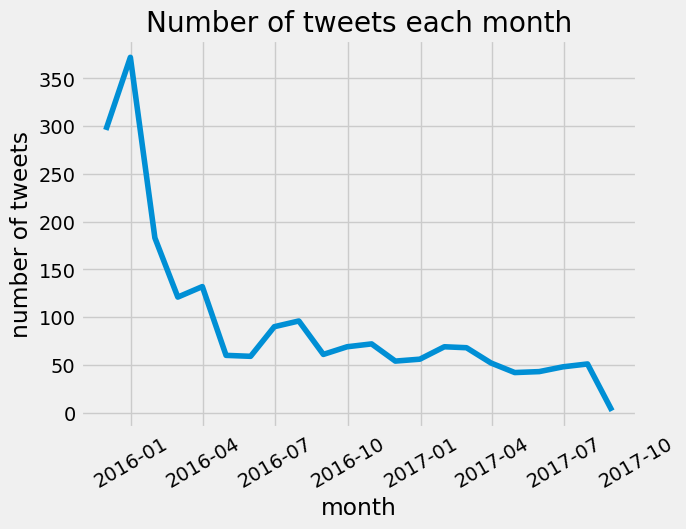

In [81]:
monthly_tweets = df.groupby(pd.Grouper(key='timestamp', freq="M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
plt.plot(monthly_tweets['timestamp'], monthly_tweets['tweet_id'])
plt.xticks(rotation=30)
plt.xlabel('month')
plt.ylabel('number of tweets')
plt.title('Number of tweets each month')
plt.show()

**Insights**
- The number of tweets decreased drastically with time. falling from over `300` tweet a month to around `60` a month.
- The peak of number of tweets by month is `388` on `December, 2015`.
- The biggest decrease in the number of tweets in two consecutive months is on `December, 2015` to `January, 2015`; with a fall of `195` tweets.

<a id='q2'></a>
### What are the most common dog stages in WeRateDogs tweets?

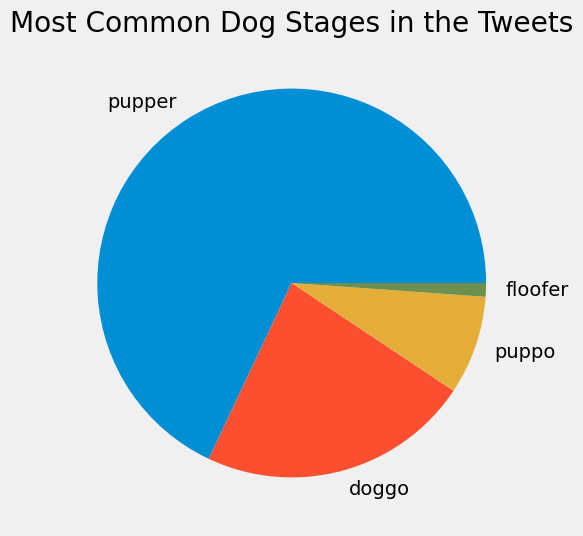

In [82]:
dog_type = df.type.value_counts()
plt.figure(figsize=(6,6))
plt.pie(dog_type.values, labels=dog_type.keys())
plt.title('Most Common Dog Stages in the Tweets')
plt.show()

<a id='q3'></a>
### What are the top 20 dog breeds with the highest average rating by WeRateDogs?

In [83]:
rating_breed = df.groupby('breed').agg({'rating': 'mean', 'tweet_id': 'count'})
rating_breed.reset_index(inplace=True)
rating_breed.sort_values('rating', ascending=True, inplace=True)
rating_breed.head()

,breed,rating,tweet_id
57,japanese spaniel,5.00,1
97,soft-coated wheaten terrier,8.50,15
107,walker hound,9.00,5
91,scotch terrier,9.00,1
51,ibizan hound,9.25,5


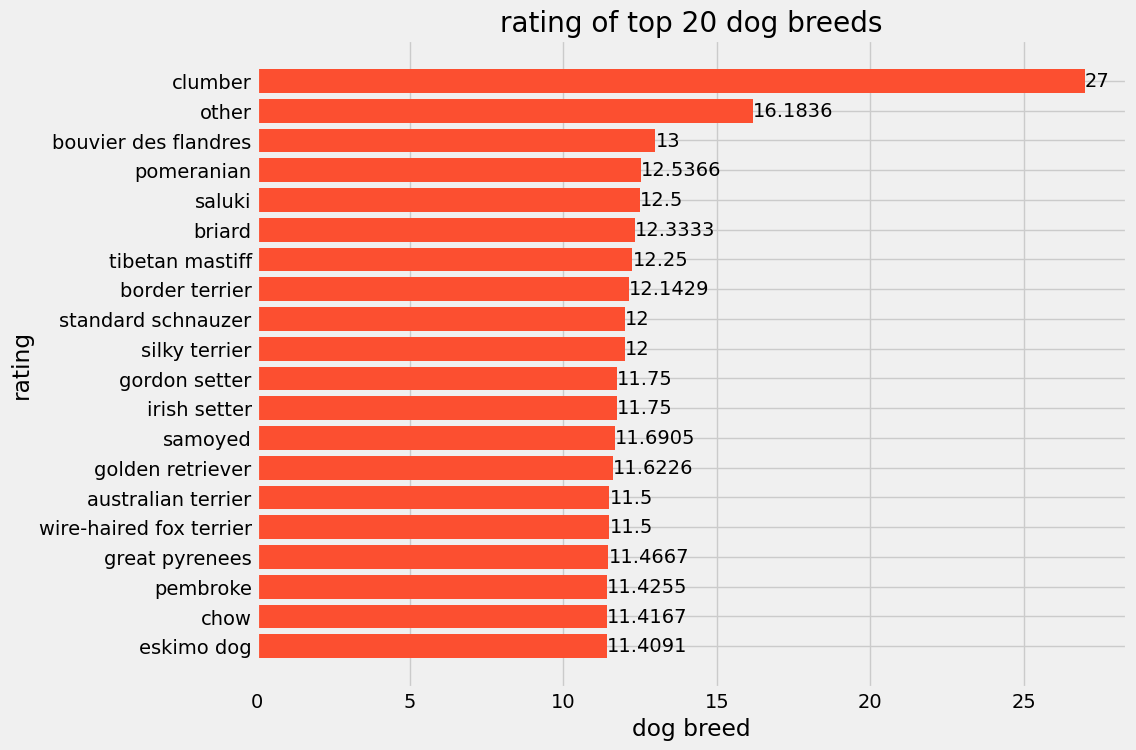

In [84]:
# getting the top 20 rated breeds
top_20 = rating_breed.iloc[-20:,:]
fig, ax = plt.subplots(figsize=(10, 8))
plt.barh(top_20['breed'], top_20['rating'])
bars = ax.barh(top_20.breed, top_20.rating)
plt.xlabel('dog breed')
plt.ylabel('rating')
plt.title('rating of top 20 dog breeds')
ax.bar_label(bars)
plt.show()

<a id='q4'></a>
### What are the top 15 dog breeds mentioned in the dataset?

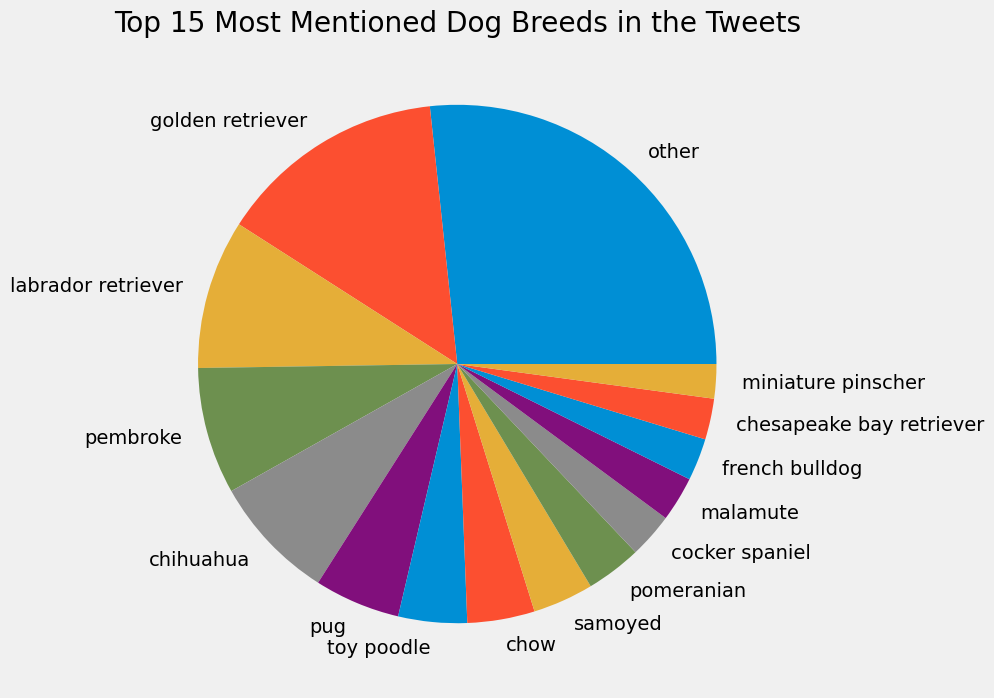

In [85]:
rating_breed.sort_values('tweet_id', ascending=False, inplace=True)
plt.figure(figsize=(8,8))
plt.pie(rating_breed.tweet_id[:15], labels=rating_breed.breed[:15])
plt.title('Top 15 Most Mentioned Dog Breeds in the Tweets')
plt.show()

<a id='q5'></a>
### What are the most popular dog names in the tweets?

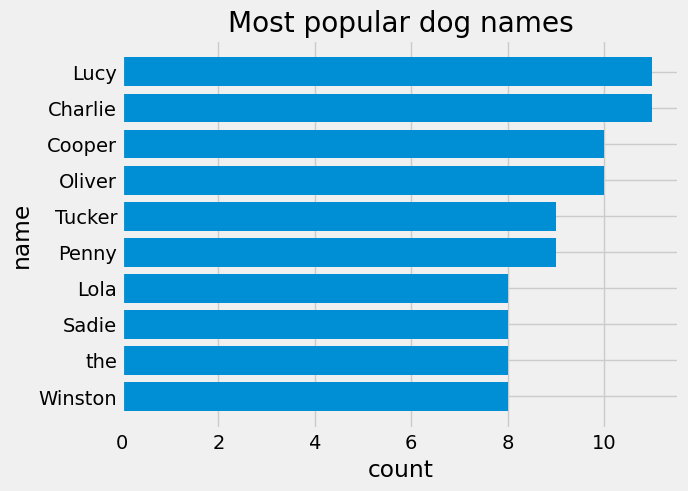

In [86]:
names = df.name.value_counts()[2:12].sort_values(ascending=True)
plt.barh(names.keys(), names.values)
plt.xlabel('count')
plt.ylabel('name')
plt.title('Most popular dog names')
plt.show()

<a id='q6'></a>
### Is there a relationship between favorite count and retweet count?

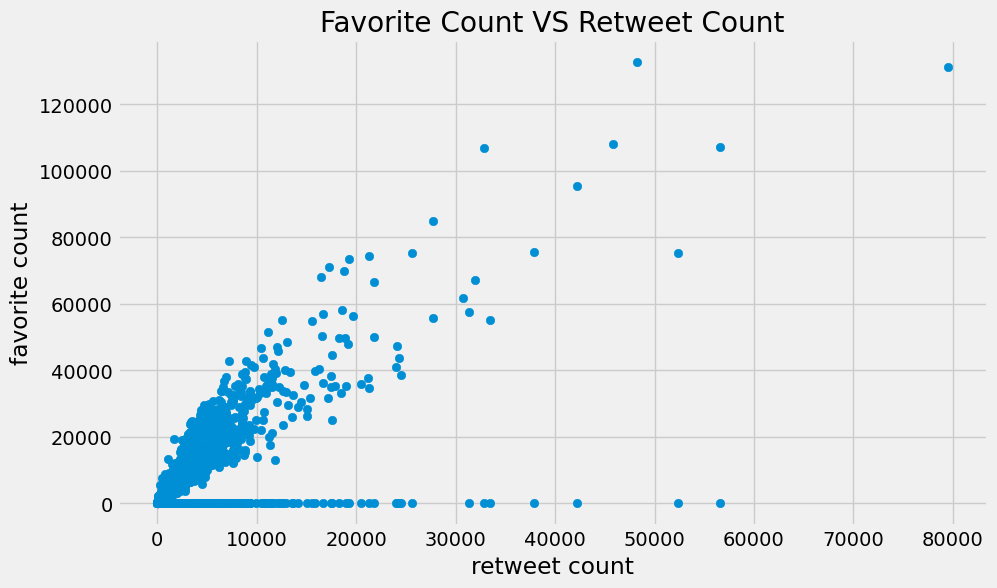

In [87]:
plt.figure(figsize=(10,6))
plt.scatter(df.retweet_count, df.favorite_count)
plt.xlabel('retweet count')
plt.ylabel('favorite count')
plt.title('Favorite Count VS Retweet Count')
plt.show()

**Insights**
- There is a positive linear correlation between `favorite_count` and `retweet_count`.
- As the the number of retweets increases, more people like the original tweet.
- People interact with the best tweets by both adding it to favorite and retweeting. More popular tweets gets more interactions.

<a id='q7'></a>
### What are the most repeated words in the tweets?

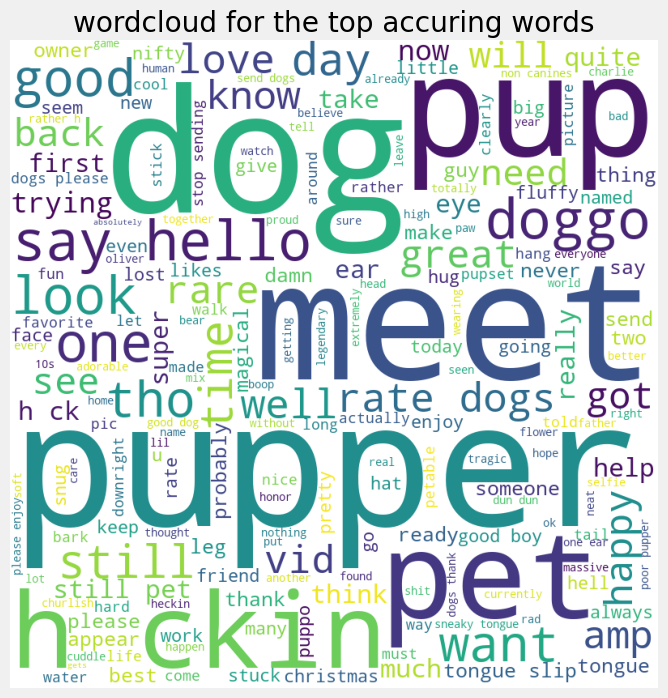

In [88]:
comment_words = ''
stopwords = set(STOPWORDS)
stopwords.update(['af', 'nan']) 

# iterate through the csv file
for val in df.text.str.split('http').str[0]:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title('wordcloud for the top accuring words')
plt.show()

<a id='conclusion'></a>
# Conclusions
- The number of monthly tweets decreased over time. falling from over `300` tweet a month to around `60` a month.
- The most common dog stage is `pupper` with over 65%; followed by `doggo`.
- The highest rated dog breed is `clumber` (That might be due to its appearance once in the dataset).
- `golden retriever` and `labrador retriever` are the most common dog breeds in the tweets.
- The most common dog name are `Lucy` and `Charlie` with 11 dogs holding that name; followed by `Oliver` and `Cooper` with 10 mentions each.
- There is a positive linear correlation between `favorite_count` and `retweet_count`.